In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mpll
import matplotlib as mpl
import pathlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import chi2_contingency
from scipy import signal as sp
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import stats as st
import statistics
import math
from scipy.interpolate import UnivariateSpline # para interpolar
from scipy.signal import find_peaks

In [ ]:
def cargar_datos_csv(archivo):
    data = pd.read_csv(archivo, skiprows=1, delimiter=",", decimal=".", header=None)
    frec = np.asarray(data[0]) #generador
    x = np.asarray(data[1]) #lock in
    y = np.asarray(data[2])
    R = np.asarray(data[3])
    theta = np.asarray(data[4])
    return frec, x, y, R, theta

In [ ]:
frecuencia, X, Y, R, tita = cargar_datos_csv("medicion_lockin3.csv")
frecuencia

array([  500.        ,  1510.20408163,  2520.40816327,  3530.6122449 ,
        4540.81632653,  5551.02040816,  6561.2244898 ,  7571.42857143,
        8581.63265306,  9591.83673469, 10602.04081633, 11612.24489796,
       12622.44897959, 13632.65306122, 14642.85714286, 15653.06122449,
       16663.26530612, 17673.46938776, 18683.67346939, 19693.87755102,
       20704.08163265, 21714.28571429, 22724.48979592, 23734.69387755,
       24744.89795918, 25755.10204082, 26765.30612245, 27775.51020408,
       28785.71428571, 29795.91836735, 30806.12244898, 31816.32653061,
       32826.53061224, 33836.73469388, 34846.93877551, 35857.14285714,
       36867.34693878, 37877.55102041, 38887.75510204, 39897.95918367,
       40908.16326531, 41918.36734694, 42928.57142857, 43938.7755102 ,
       44948.97959184, 45959.18367347, 46969.3877551 , 47979.59183673,
       48989.79591837, 50000.        ])

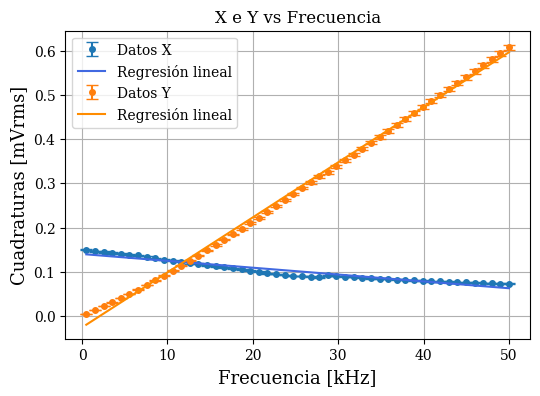

(-0.0015488582732496167, 0.012451794156049094)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x1 = frecuencia / 1000
y1 = X * 1000
xerr1 = 0
yerr1 = 0

x2 = frecuencia / 1000
y2 = Y * 1000
xerr2 = 0
yerr2 = 0

p_opt1, p_cov1 = curve_fit(lineal, x1, y1)
m_optimo1 = p_opt1[0]
b_optimo1 = p_opt1[1]
b_error1 = p_cov1[1,1]**0.5
m_error1 = p_cov1[0,0]**0.5

y_predicho1 = lineal(x1,np.array(m_optimo1),np.array(b_optimo1)) #lineal
residuos1 = y1 - y_predicho1

p_opt2, p_cov2 = curve_fit(lineal, x2, y2)
m_optimo2 = p_opt2[0]
b_optimo2 = p_opt2[1]
b_error2 = p_cov2[1,1]**0.5
m_error2 = p_cov2[0,0]**0.5

y_predicho2 = lineal(x2,np.array(m_optimo2),np.array(b_optimo2)) #lineal
residuos2 = y2 - y_predicho2

errorX = []
errorY = []

for i in range(len(X)):
    errorX.append(X[i] * 0.01) #en el manual tira 0.01
    errorY.append(Y[i] * 0.01)

# Graficar con barras de error
errorX=np.array(errorX)
errorY=np.array(errorY)

plt.figure(figsize=(6, 4))
plt.errorbar(frecuencia / 1000, X * 1000, yerr=errorX * 1000, fmt='o', label='Datos X', capsize=4, markersize=4)
plt.errorbar(frecuencia / 1000, y_predicho1, label="Regresión lineal", color = "#4169E1")

plt.errorbar(frecuencia / 1000, Y * 1000, yerr=errorY * 1000, fmt='o', label='Datos Y', capsize=4, markersize=4)
plt.errorbar(frecuencia / 1000, y_predicho2, label="Regresión lineal", color = "#FF8C00")
# Títulos y etiquetas
plt.title('X e Y vs Frecuencia')
plt.xlabel('Frecuencia [kHz]', fontsize=13)
plt.ylabel('Cuadraturas [mVrms]', fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

m_optimo1, m_optimo2

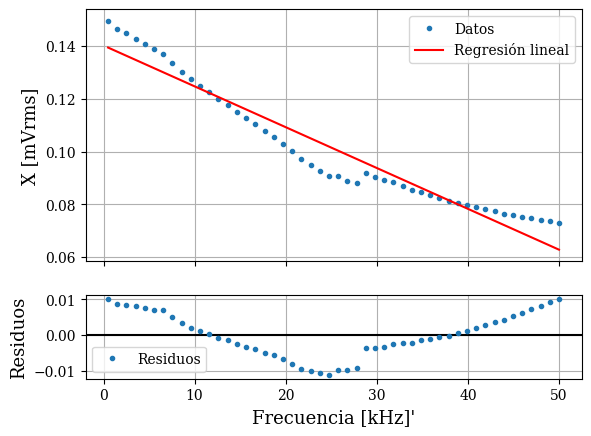

(-0.0015488582732496167, 6.111363911262503e-05)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x = frecuencia / 1000
y = X * 1000
xerr = 0
yerr = 0

p_opt, p_cov = curve_fit(lineal, x, y)
m_optimo = p_opt[0]
b_optimo = p_opt[1]
b_error = p_cov[1,1]**0.5
m_error = p_cov[0,0]**0.5


y_predicho = lineal(x,np.array(m_optimo),np.array(b_optimo)) #lineal
residuos = y - y_predicho


#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x, y, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x, y_predicho, label="Regresión lineal", color = "red")
ax[1].errorbar(x, residuos, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("X [mVrms]", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("Frecuencia [kHz]'", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo, m_error

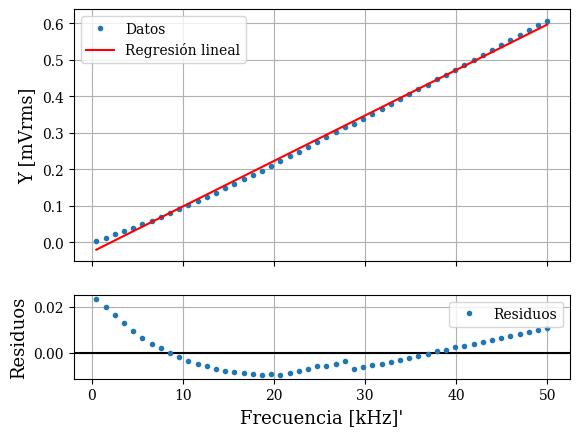

(0.012451794156049094, 8.001762626670867e-05)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x = frecuencia / 1000
y = Y * 1000
xerr = 0
yerr = 0

p_opt, p_cov = curve_fit(lineal, x, y)
m_optimo = p_opt[0]
b_optimo = p_opt[1]
b_error = p_cov[1,1]**0.5
m_error = p_cov[0,0]**0.5


y_predicho = lineal(x,np.array(m_optimo),np.array(b_optimo)) #lineal
residuos = y - y_predicho


#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x, y, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x, y_predicho, label="Regresión lineal", color = "red")
ax[1].errorbar(x, residuos, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("Y [mVrms]", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("Frecuencia [kHz]'", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo, m_error

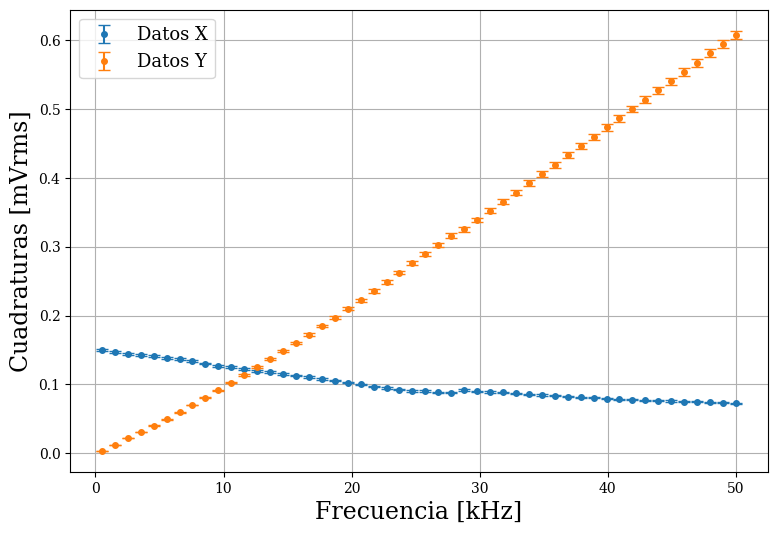

In [ ]:
errorX = []
errorY = []

for i in range(len(X)):
    errorX.append(X[i] * 0.01) #en el manual tira 0.01
    errorY.append(Y[i] * 0.01)

# Graficar con barras de error
errorX=np.array(errorX)
errorY=np.array(errorY)

plt.figure(figsize=(9, 6))
plt.errorbar(frecuencia / 1000, X * 1000, yerr=errorX * 1000, fmt='o', label='Datos X', capsize=4, markersize=4)
plt.errorbar(frecuencia / 1000, Y * 1000, yerr=errorY * 1000, fmt='o', label='Datos Y', capsize=4, markersize=4)
# Títulos y etiquetas
plt.xlabel('Frecuencia [kHz]', fontsize=17)
plt.ylabel('Cuadraturas [mVrms]', fontsize=17)
plt.grid(True)
plt.legend(fontsize = 13)
plt.show()

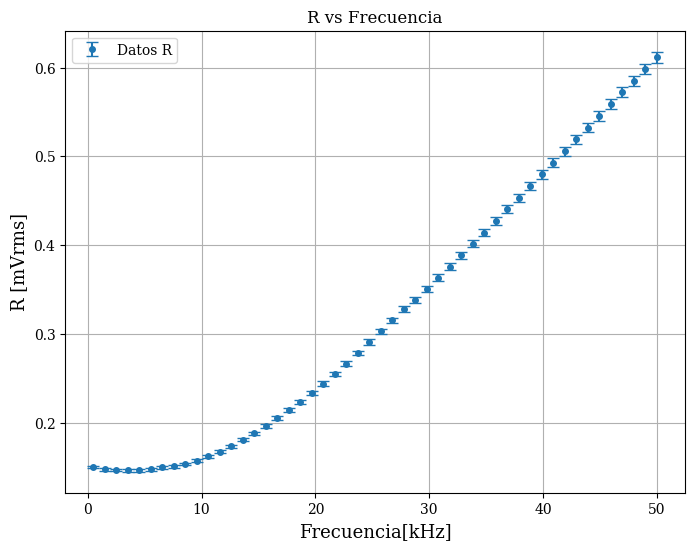

In [ ]:
errorR = []

for i in range(len(R)):
    errorR.append(R[i] * 0.01) #en el manual tira 0.01

errorR=np.array(errorR)

plt.figure(figsize=(8, 6))
plt.errorbar(frecuencia / 1000, R * 1000, yerr=errorR * 1000, fmt='o', label='Datos R', capsize=4, markersize=4)
plt.title('R vs Frecuencia')
plt.xlabel('Frecuencia[kHz]', fontsize = 13)
plt.ylabel('R [mVrms]', fontsize = 13)
plt.grid(True)
plt.legend()
plt.show()


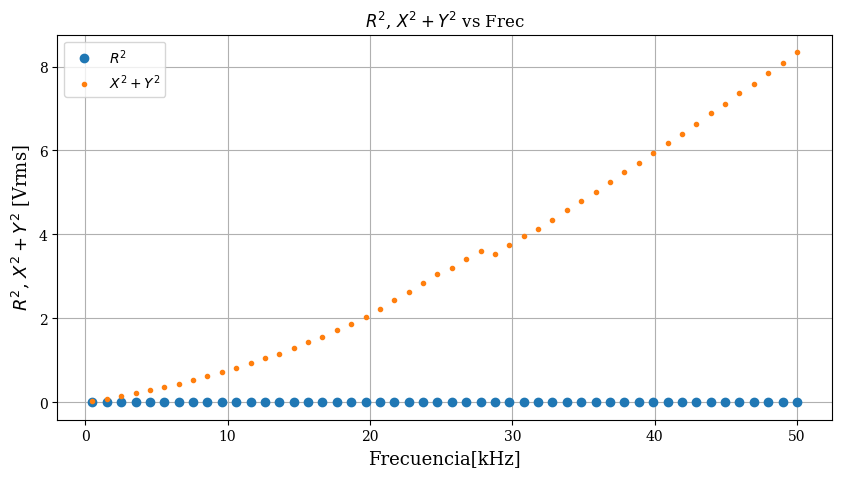

In [ ]:
errorRcuad = []

for i in range(len(R)):
    errorRcuad.append(R[i]*0.01) #en el manual tira 0.01

plt.figure(figsize=(10, 5))
plt.plot(frecuencia/1000, R**2,'o', label='$R^2$')
plt.plot(frecuencia/1000, Y/X,'o', label='$X^2 + Y^2$', markersize=3)
plt.title('$R^2$, $X^2 + Y^2$ vs Frec') #no se como poner el title para que se entienda que pusimos las dos cosas
plt.xlabel('Frecuencia[kHz]', fontsize = 13)
plt.ylabel('$R^2$, $X^2 + Y^2$ [Vrms]', fontsize = 13)
plt.grid(True)
plt.legend()
plt.show()

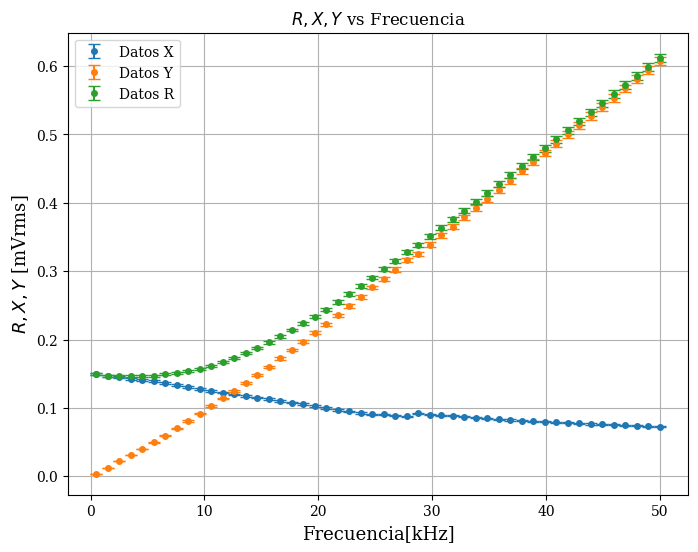

In [ ]:
errorRcuad = []

for i in range(len(R)):
    errorRcuad.append(R[i]*0.01) #en el manual tira 0.01

plt.figure(figsize=(8, 6))

plt.errorbar(frecuencia / 1000, X * 1000, yerr=errorX * 1000, fmt='o', label='Datos X', capsize=4, markersize=4)
plt.errorbar(frecuencia / 1000, Y * 1000, yerr=errorY * 1000, fmt='o', label='Datos Y', capsize=4, markersize=4)
plt.errorbar(frecuencia / 1000, R * 1000, yerr=errorR * 1000, fmt='o', label='Datos R', capsize=4, markersize=4)
plt.title('$R, X, Y$ vs Frecuencia') #no se como poner el title para que se entienda que pusimos las dos cosas
plt.xlabel('Frecuencia[kHz]', fontsize = 13)
plt.ylabel('$R,X,Y$ [mVrms]', fontsize = 13)
plt.grid(True)
plt.legend()
plt.show()

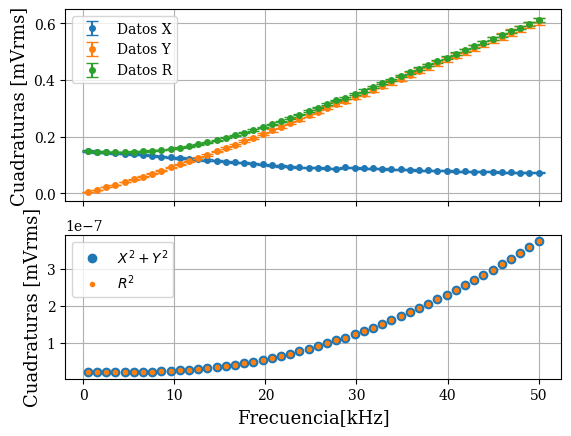

In [ ]:
errorX = []
errorY = []

for i in range(len(X)):
    errorX.append(X[i] * 0.02) #en el manual tira 0.01 pero le meto un poco mas
    errorY.append(Y[i] * 0.02)

errorR = []

for i in range(len(R)):
    errorR.append(R[i] * 0.01) #en el manual tira 0.01 pero le meto un poco mas

# Graficar con barras de error
errorX=np.array(errorX)
errorY=np.array(errorY)
errorR=np.array(errorR)

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [4, 3]})


ax[0].errorbar(frecuencia / 1000, X * 1000, yerr=errorX * 1000, fmt='o', label='Datos X', capsize=4, markersize=4)
ax[0].errorbar(frecuencia / 1000, Y * 1000, yerr=errorY * 1000, fmt='o', label='Datos Y', capsize=4, markersize=4)
ax[0].errorbar(frecuencia / 1000, R * 1000, yerr=errorR * 1000, fmt='o', label='Datos R', capsize=4, markersize=4)
ax[1].plot(frecuencia/1000, (X**2 +Y**2),'o', label='$X^2 + Y^2$')
ax[1].plot(frecuencia/1000, R**2,'o', label='$R^2$', markersize = 3)

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("Cuadraturas [mVrms]", fontsize = 13)
ax[1].set_ylabel("Cuadraturas [mVrms]", fontsize = 13)
ax[1].set_xlabel("Frecuencia[kHz]", fontsize = 13)

# ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()